In [ ]:
!

In [16]:
import numpy as np
import open3d as o3d
import copy
import csv
from matplotlib import pyplot as plt
from open3d import visualization
import file_path
import plotPose3D

[[ 0.06527003 -0.34434943  0.93656996  1.49705888]
 [-0.96773135 -0.25076507 -0.02475732  0.4157759 ]
 [ 0.2433842  -0.9047322  -0.34960518  1.28250503]
 [ 0.          0.          0.          1.        ]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [18]:
x = [] #dvs pixel x in mm
y = [] #dvs pixel y in mm
depth = [] #depth from depth sensor
time_stamp = [] 
x_pixel = [] #dvs pixel x in mm
y_pixel = [] #dvs pixel y 


#events.tsv: A TSV file where each row corresponds to one event.
# Provided data is: PrimeSense image coordinates (x,y), PrimeSense depth measurement,
# EDVS image coordinates (x,y), Timestamp (in microsenconds), EDVS parity flag
base_directory = r"/home/bru/Dev/DATA/scn2_take01/take01/"
filename = "events.csv" 
full_path = file_path.file_path(base_directory, filename)

with open(full_path, encoding="Latin-1") as csvfile:
    reader = list(csv.reader(csvfile, delimiter=","))
    
num_events = len(reader)
num_events_batch = 5000 
import pandas as pd

for i in range(0,num_events):
    depth.append((reader[i][2]))
    x.append(((int(reader[i][3])/128)-0.5)*1000) # convert x_pixels to x in millimeters (according to camera intrinsics of DAVIS128) K = [128, 0, 64; 0, 128, 64; 0, 0, 1]
    y.append(((int(reader[i][4])/128)-0.5)*1000) # convert y_pixels to y in millimeters
    x_pixel.append(int(reader[i][3])) 
    y_pixel.append(int(reader[i][4]))
    time_stamp.append((reader[i][5]))
        

In [4]:
iEv = 0 #num event
iBatch = 0 #num batch
data_size = (num_events_batch ,3) 
num_arr = 0
while True:
    # Check if we have processed all events
    if (iEv + num_events_batch > num_events):
        break
        
    # Select subset of events or data
    
    depth_batch = np.array(depth[iEv+0:iEv+num_events_batch]).astype(np.float64)
    x_batch = np.array(x[iEv+0:iEv+num_events_batch]).astype(np.float64)
    y_batch = np.array(y[iEv+0:iEv+num_events_batch]).astype(np.float64)
    batches = (np.c_[x_batch,y_batch, depth_batch]).astype(np.float64)
    
    #Save .ply files
    #filename = "point_clouds/depth_event_%08d.ply" %iBatch
    #full_path = file_path.file_path(base_directory, filename)
    #write_text = True
    #save_ply(batches, write_text, filename)
        
    iEv += num_events_batch
    iBatch += 1

(5000,) [  93.75    109.375  -335.9375 ...  171.875   -62.5     343.75  ] [ 304.6875   15.625     0.     ... -218.75    265.625    -7.8125]
(5000,) [ 187.5    -117.1875  -93.75   ...  101.5625   15.625   101.5625] [-218.75    265.625   -62.5    ... -101.5625  -39.0625  281.25  ]
(5000,) [  23.4375 -351.5625   54.6875 ...  101.5625  218.75    257.8125] [-179.6875  421.875    -7.8125 ... -179.6875   46.875   218.75  ]
(5000,) [ 226.5625  156.25    140.625  ... -109.375   117.1875  250.    ] [  62.5      93.75     93.75   ...  335.9375    7.8125 -203.125 ]
(5000,) [ 335.9375   31.25    109.375  ...   15.625  -140.625    93.75  ] [-171.875   -46.875   312.5    ...  312.5     335.9375  109.375 ]
(5000,) [  70.3125 -132.8125  -70.3125 ...  -31.25     31.25   -148.4375] [296.875  296.875  335.9375 ... 351.5625   7.8125 335.9375]
(5000,) [195.3125  46.875  187.5    ... 390.625  445.3125 195.3125] [398.4375 335.9375 289.0625 ...  -7.8125 195.3125 390.625 ]
(5000,) [ 101.5625 -265.625  -304.6875

(5000,) [-460.9375 -187.5     -23.4375 ... -265.625  -281.25    101.5625] [ -23.4375 -328.125   265.625  ...  -31.25    179.6875  281.25  ]
(5000,) [-156.25   -250.      226.5625 ...   39.0625 -132.8125  -85.9375] [-296.875   -54.6875   85.9375 ...  257.8125 -375.      226.5625]
(5000,) [-476.5625 -398.4375 -476.5625 ...  125.     -367.1875 -218.75  ] [  78.125     7.8125 -304.6875 ... -273.4375  140.625   210.9375]
(5000,) [ -70.3125  -31.25     46.875  ...   31.25   -335.9375  242.1875] [-257.8125  164.0625 -226.5625 ... -367.1875  -54.6875 -257.8125]
(5000,) [  15.625   210.9375 -203.125  ...  156.25     54.6875 -187.5   ] [ 250.      140.625   148.4375 ... -312.5     414.0625  265.625 ]
(5000,) [ 132.8125 -187.5     -39.0625 ...  226.5625 -234.375  -210.9375] [-429.6875  218.75    132.8125 ...  179.6875 -250.     -148.4375]
(5000,) [ 179.6875  257.8125 -203.125  ...  132.8125 -296.875  -210.9375] [-296.875    93.75    265.625  ...  367.1875 -359.375  -101.5625]
(5000,) [  54.6875  

(5000,) [-328.125   226.5625  132.8125 ...  351.5625 -203.125  -109.375 ] [ 203.125  -101.5625 -343.75   ... -343.75   -195.3125  156.25  ]
(5000,) [-171.875     7.8125 -148.4375 ...  148.4375 -281.25    460.9375] [-187.5    -218.75   -343.75   ... -179.6875  218.75    140.625 ]
(5000,) [ -46.875  -210.9375  140.625  ... -140.625   148.4375   70.3125] [-335.9375  125.     -429.6875 ...  109.375  -304.6875  273.4375]
(5000,) [   7.8125    7.8125  296.875  ... -179.6875  -23.4375 -234.375 ] [351.5625 156.25   203.125  ... 125.      62.5    367.1875]
(5000,) [  15.625   476.5625  437.5    ... -320.3125  468.75     -7.8125] [ 171.875   148.4375 -351.5625 ...  132.8125 -226.5625  164.0625]
(5000,) [ 132.8125 -289.0625  359.375  ... -109.375  -359.375   -46.875 ] [-312.5     203.125  -226.5625 ...  171.875  -273.4375   46.875 ]
(5000,) [-179.6875  -31.25    218.75   ... -117.1875 -312.5     -70.3125] [  85.9375  109.375   210.9375 ...   78.125  -140.625   132.8125]


In [7]:
from scipy.spatial.transform import Rotation as R
x_pos = []
y_pos = []
z_pos = []
x_rot = []
y_rot = []
z_rot = []
T_rest = np.identity(4)
T_new = []
T_orj = []
rot_icp = []
quaternions = []
l= []
Time = []
num_batch_apart = 1 #skip this much point cloud (When point clouds are too close to each other, there is not much change)
#Can be dynamically change!!



for i in range(iBatch-num_batch_apart):
    filename_source = "point_clouds/depth_event_%08d.ply" %i
    full_path_source = file_path.file_path(base_directory, filename_source)
    source = o3d.io.read_point_cloud(full_path_source)
    
    filename_target = "point_clouds/depth_event_%08d.ply" %(i+num_batch_apart)
    full_path_target = file_path.file_path(base_directory, filename_target)
    target = o3d.io.read_point_cloud(full_path_target)
    
    max_correspondence_distance = 30   # mm, for ICP
    trans_init = np.identity(4) #for ICP to initialize transformation matrix might be changed to see how robust the algorithm is??

    #ICP_func.draw_registration_result(source, target, trans_init) #For first alignment
    #print("Initial alignment")
    
    evaluation = o3d.pipelines.registration.evaluate_registration(source, target,
                                                    max_correspondence_distance, trans_init)
    #print(evaluation)
        
    #POINT TO POINT ICP
    reg_p2p = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint(),
        o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=3000))
    # The class TransformationEstimationPointToPoint provides functions to compute the residuals and Jacobian matrices of the point-to-point ICP objective. 
    #The function registration_icp takes it as a parameter and runs point-to-point ICP to obtain the results.
    T = reg_p2p.transformation
    #print(T)
    
    if i == 0:
        T_init = T
        
    
    #print("o",T)
    T_orj.append(T)
    T_rest = np.dot(T_rest, T)
    #print("r",T_rest)
    T_new.append(T_rest)
    
    x_pos.append((T_rest[0][3]-T_init[0][3]))
    y_pos.append((T_rest[1][3]-T_init[1][3]))
    z_pos.append((T_rest[2][3]-T_init[2][3]))
    #print(T_rest[0][3])
    #print(x_pos[i-1])
    
    rot_icp = np.array(([T_rest[0][0],T_rest[0][1],T_rest[0][2]],
                        [T_rest[1][0],T_rest[1][1],T_rest[1][2]],
                        [T_rest[2][0],T_rest[2][1],T_rest[2][2]]))
                                  
    r = R.from_matrix(rot_icp)
    quaternion = r.as_quat() 
    quaternions.append(quaternion)
    
    #l = l.append(Time[i],x_pos[i],y_pos[i],z_pos[i], quaternion[i])
    #l = np.c_[Time,x_pos,y_pos,z_pos,quaternions]
    #T_iterative = np.append(T_iterative , new).reshape((iteration+1,4,4))
    #print((T_iterative_list.shape))
    
    Time.append(i)
    
#pos = (np.c_[x_pos,y_pos,z_pos]).astype(np.float32)
#print(pos)
  
l = ((np.c_[Time,x_pos,y_pos,z_pos,quaternions])).astype(np.float32)

    
#save .txt files
filename = "/home/bru/Dev/DATA/scn2_take01/take01/estimation.txt" 
np.savetxt(filename, l, delimiter=" ")
print("Done! iBatch is equal to:",iBatch )
#print("begin",quaternions)
#print(y_pos,z_pos)


Done! iBatch is equal to: 196


In [10]:
from scipy.spatial.transform import Rotation as R
import scipy
import numpy as np
import array

x_gt = []
y_gt = []
z_gt = []
x_rot = []
y_rot = []
z_rot = []
quaternions = []
time = []
quaternion_x = []
quaternion_y = []
quaternion_z = []
quaternion_w = []

with open('/home/bru/Dev/DATA/scn2_take01/take01/gt.csv', encoding="Latin-1") as csvfile:
    reader = list(csv.reader(csvfile, delimiter=','))

num_data = len(reader)
print("num_data:",num_data)
#print("estimation:", iBatch)
reader = np.array(reader).astype(np.float64)
T_init_x = reader[0][0]
T_init_y = reader[0][1]
T_init_z = reader[0][2]



for i in range(len(reader)):
    reader[i][0] = (reader[i][0])-(T_init_x)
    reader[i][1] = (reader[i][1])-(T_init_y)
    reader[i][2] = (reader[i][2])-(T_init_z)
    x_gt.append(float(reader[i][0]))
    y_gt.append(float(reader[i][1]))
    z_gt.append(float(reader[i][2]))
    z_rot.append((reader[i][5]))
    x_rot.append((reader[i][3]))
    y_rot.append((reader[i][4]))
    
    #rot_gt = np.array(([T_rest[0][0],T_rest[0][1],T_rest[0][2]],
                        #[T_rest[1][0],T_rest[1][1],T_rest[1][2]],
                        #[T_rest[2][0],T_rest[2][1],T_rest[2][2]]))
                                    
   # R = np.zeros((3,3),dtype=float) #rotation matrix
   # R = (rot_gt)/np.linalg.norm(rot_gt)
    #R[:,0] = (rot_icp[:,0])/np.linalg.norm(rot_icp[:,0])
    
    #r = np.math.sqrt(float(1)+R[0,0]+R[1,1]+R[2,2])*0.5
    
    #i = (R[2,1]-R[1,2])/(4*r)
    #j = (R[0,2]-R[2,0])/(4*r)
    #k = (R[1,0]-R[0,1])/(4*r)
    

    time.append(i)
    
    r = R.from_rotvec([[x_rot[-1],y_rot[-1], z_rot[-1]]])
    rot_matx = r.as_matrix()
    ro = r.from_matrix(rot_matx)
    
    quaternion = ro.as_quat()
    quaternion = np.array(quaternion)
    #print(quaternion[0][1])
    quaternion_x.append(quaternion[0][0])
    quaternion_y.append(quaternion[0][1])
    quaternion_z.append(quaternion[0][2])
    quaternion_w.append(quaternion[0][3])
    
    
    
    #print(len(time))
#print(quaternions)
l_gt = (np.c_[time,(x_gt),(y_gt),(z_gt),quaternion_x, quaternion_y, quaternion_z, quaternion_w]).astype(np.float64) 
#print(l_gt)
#save .txt files
filename = "/home/bru/Dev/DATA/scn2_take01/take01/gt.txt" 
np.savetxt(filename, l_gt, delimiter=" ")
quaternions = np.array(quaternions)
print(len(l_gt))
#print("begin",quaternions)

num_data: 2299
2299


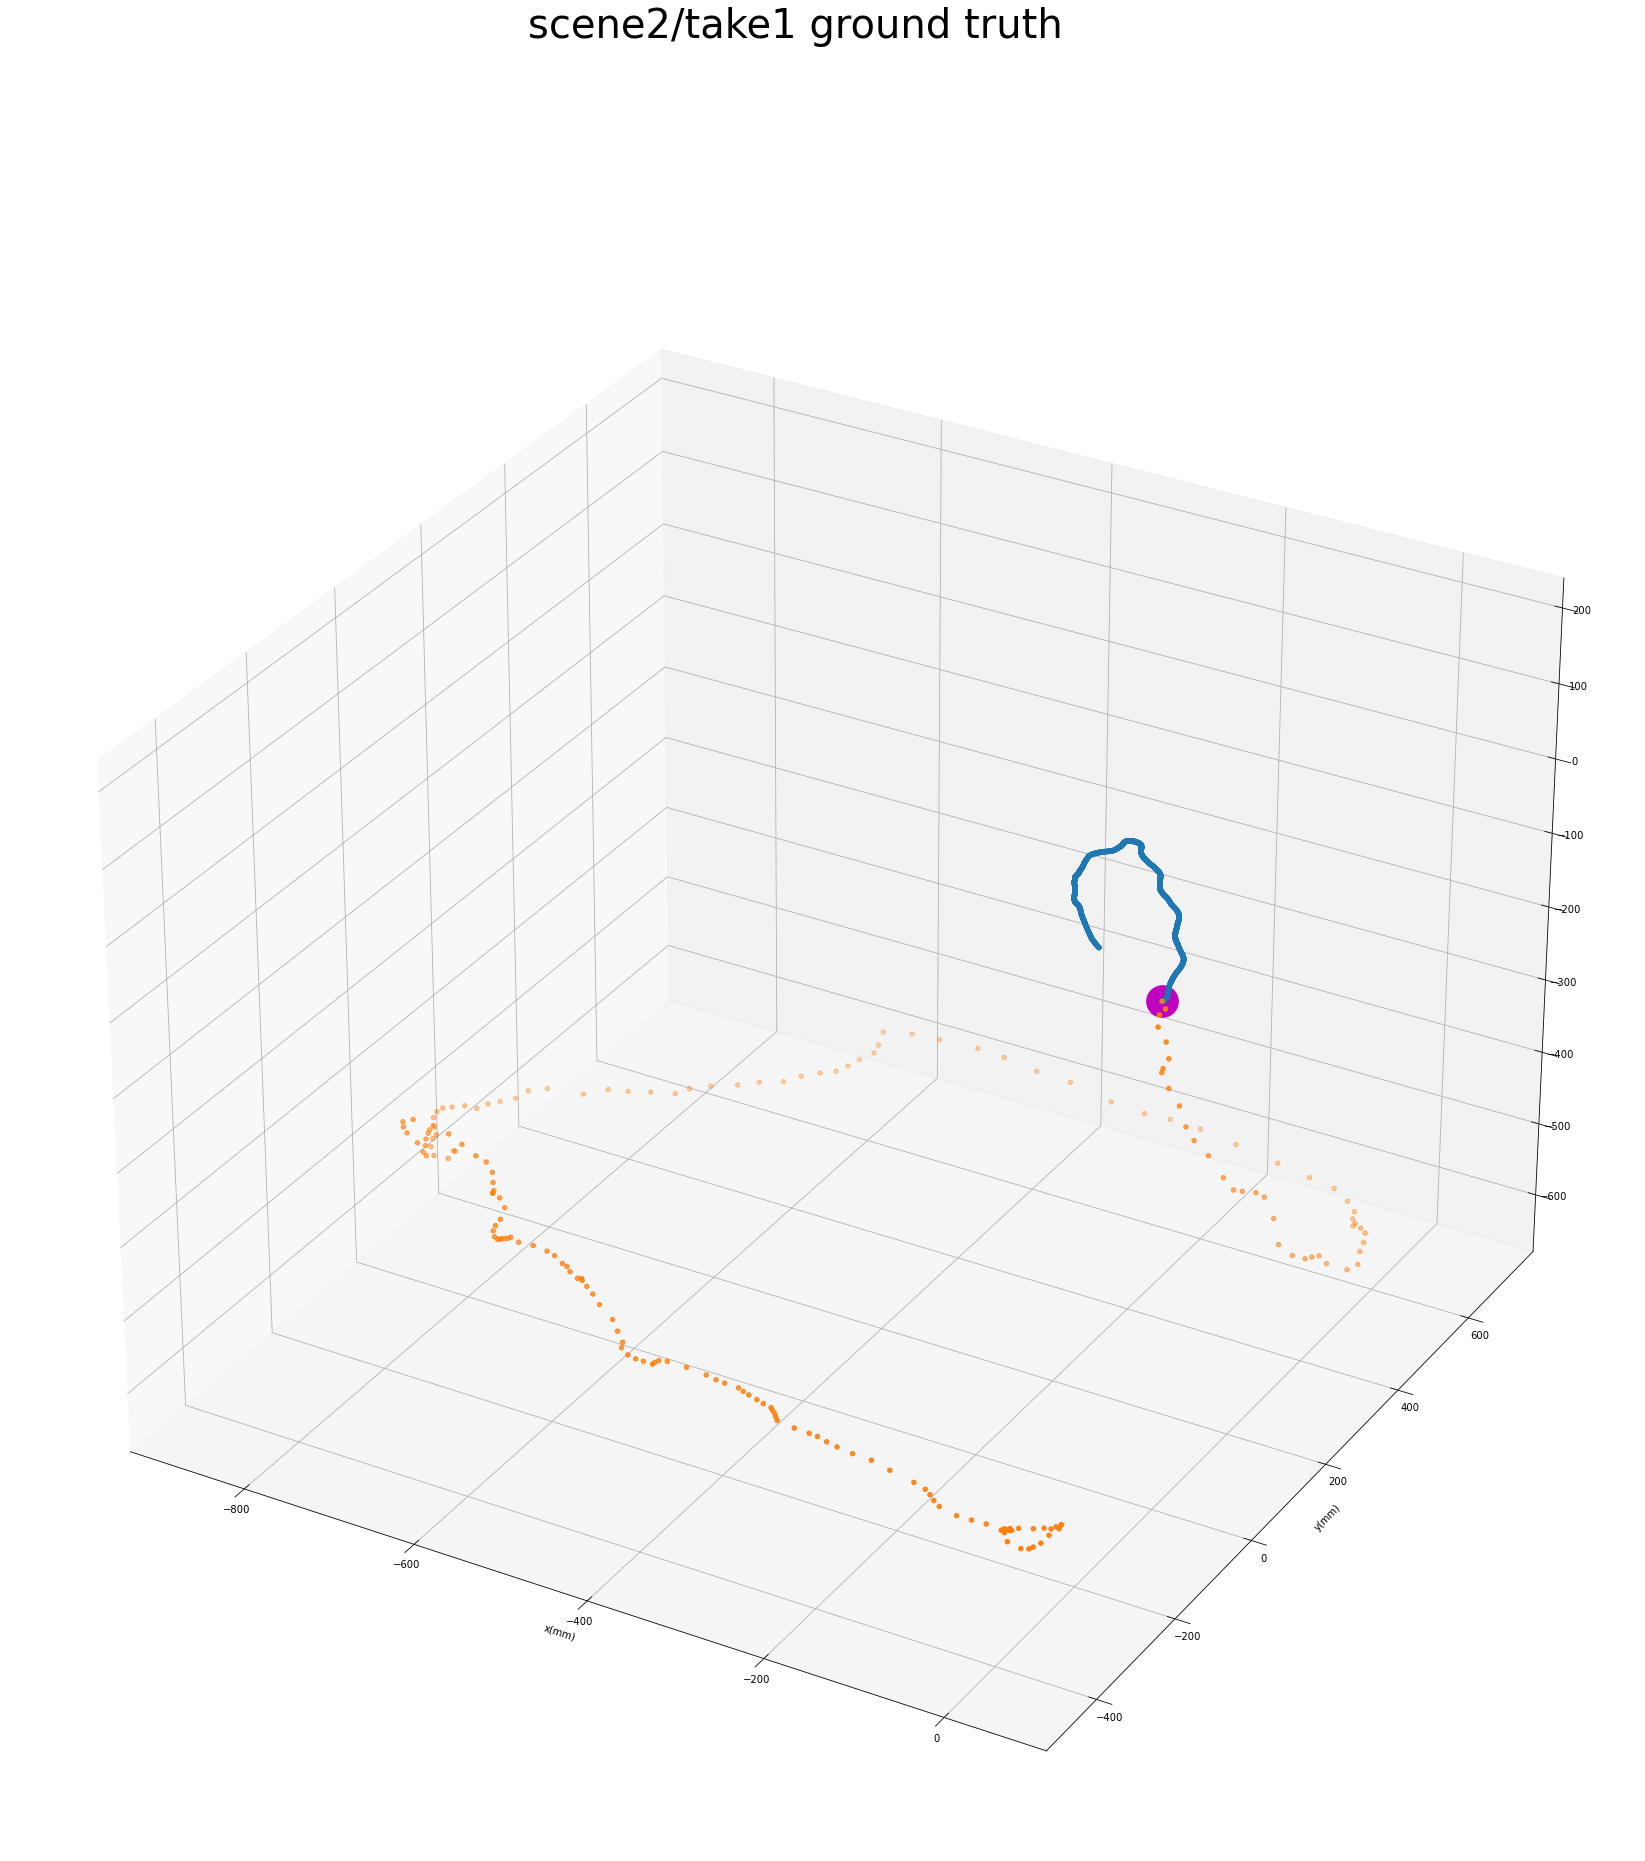

In [12]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_gt[0], y_gt[0], z_gt[0], s=1000, c="m")
ax.scatter(x_gt,y_gt,z_gt)
ax.scatter(x_pos,y_pos,z_pos)
plt.xlabel('x(mm)')
plt.ylabel('y(mm)')
fig.suptitle('scene2/take1 ground truth', fontsize=40)
plt.savefig('/home/bru/Dev/DATA/scn2_take01/take01/gt_estimation.png')
plt.show()

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
"""
color = np.zeros(len(x_pos),int)
color[0] = 1
size = np.zeros(len(x_pos),int)
size[0] = 1
#fig = plt.figure(figsize=(30, 30))
#ax = fig.add_subplot(projection='3d')
#dataset = pd.DataFrame({'x': x_pos, 'y': y_pos, 'z': z_pos, 'c': color, 's': size})

fig = px.scatter_3d(dataset, x = 'x',
                    y = 'y',
                    z= 'z', 
                    color='c')#, size='s')
"""
color = np.zeros(len(x_gt),int)
color[0] = 1
size = np.zeros(len(x_gt),int)
dataset_gt = pd.DataFrame({'x': x_gt, 'y': y_gt, 'z': z_gt, 'c': color, 's': size})
fig = px.scatter_3d(dataset_gt, x = 'x',
                    y = 'y',
                    z= 'z', 
                    color='c')
fig.update_traces(marker_size = 1)
fig.show()

In [28]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

color = np.zeros(len(x_pos),int)
color[0] = 1
size = np.zeros(len(x_pos),int)
size[0] = 1
#fig = plt.figure(figsize=(30, 30))
#ax = fig.add_subplot(projection='3d')
dataset = pd.DataFrame({'x': x_pos, 'y': y_pos, 'z': z_pos, 'c': color, 's': size})

fig = px.scatter_3d(dataset, x = 'x',
                    y = 'y',
                    z= 'z', 
                    color='c')#, size='s')
                    
fig.update_traces(marker_size = 1)
fig.show()

In [13]:
def slerp(q1, q2, t):
    """Spherical linear interpolation of quaternions."""
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 *= -1.0
        dot *= -1.0
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)
    sin_theta_0 = np.sin(theta_0)
    if abs(sin_theta_0) < 0.001:
        return (1.0 - t) * q1 + t * q2
    theta = theta_0 * t
    sin_theta = np.sin(theta)
    s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
    s1 = sin_theta / sin_theta_0
    return s0 * q1 + s1 * q2

def interpolate_data(original_data, ground_truth_data):
    # Create array to store interpolated data
    interpolated_data = np.zeros_like(ground_truth_data)

    # Time column will be directly copied from the ground truth data
    interpolated_data[:, 0] = ground_truth_data[:, 0]

    # Interpolate for each position dimension (x, y, z)
    for i in range(1, 4):
        interpolated_data[:, i] = np.interp(ground_truth_data[:, 0], original_data[:, 0], original_data[:, i])

    # Interpolate for quaternion components (qx, qy, qz, qw) using spherical linear interpolation (SLERP)
    original_rotations = original_data[:, 4:]
    for t_idx, t in enumerate(ground_truth_data[:, 0]):
        # Skip if time is not within original time range
        if t < original_data[0, 0] or t > original_data[-1, 0]:
            continue
        # Find two closest rotations in original data
        lower_idx = np.searchsorted(original_data[:, 0], t) - 1
        upper_idx = lower_idx + 1
        # Skip if time is outside of original time points
        if lower_idx < 0 or upper_idx >= len(original_data):
            continue
        # Compute interpolation factor for SLERP
        interp_factor = (t - original_data[lower_idx, 0]) / (original_data[upper_idx, 0] - original_data[lower_idx, 0])
        # Perform SLERP
        slerped_rotation = slerp(original_rotations[lower_idx], original_rotations[upper_idx], interp_factor)
        # Store in output data
        interpolated_data[t_idx, 4:] = slerped_rotation

    # Ensure the beginning and ending points match the original data
    first_time_in_ground_truth = np.searchsorted(ground_truth_data[:, 0], original_data[0, 0])
    last_time_in_ground_truth = np.searchsorted(ground_truth_data[:, 0], original_data[-1, 0])
    interpolated_data[first_time_in_ground_truth] = original_data[0]
    interpolated_data[last_time_in_ground_truth] = original_data[-1]
    
    return interpolated_data

In [ ]:
interpolated_estimation = interpolate_data(l, l_gt)
print((l_gt[2]))
#print((interpolated_estimation[2]))
interpolated_estimation[:, 1:4] /= 1000
l_gt[:, 1:4] /= 1000
#print((l_gt[2]))
print((interpolated_estimation[2]))



In [ ]:
#save .txt files
filename = "/home/bru/Dev/DATA/scn2c_take01/take01/estimation_interpolated_mm.txt" 
np.savetxt(filename, interpolated_estimation, delimiter=" ")
#save .txt files
filename = "/home/bru/Dev/DATA/scn2c_take01/take01/gt_mm.txt" 
np.savetxt(filename, l_gt, delimiter=" ")
print(interpolated_estimation.shape)

In [ ]:
print(interpolated_estimation[6][3],l_gt[6][3])

In [ ]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(projection='3d')
ax.scatter(interpolated_estimation[:,1], interpolated_estimation[:,2], interpolated_estimation[:,3], s=1000, c="r")
ax.scatter(l_gt[:,1],l_gt[:,2],l_gt[:,3])
#ax.scatter(x_pos,y_pos,z_pos)
fig.suptitle('scene2/take1 ground truth', fontsize=40)
#plt.savefig('/home/bru/Dev/DATA/scn2c_take01/take01/gt_estimation.png')
plt.show()